# [Birth-and-deathProcessesinPython: TheBirDePyPackage](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2110.05067.pdf)

- https://birdepy.github.io/
- [How to use parallel job in pipeline (V2)](https://learn.microsoft.com/en-us/azure/machine-learning/how-to-use-parallel-job-in-pipeline?view=azureml-api-2&tabs=cliv2)

In [1]:
# %pip install BirDePy

In [2]:
import birdepy as bd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = "Verhulst"
rate_of_spread = 0.75
recovery_rate = 0.25
population_size = 1000
true_parameters = [rate_of_spread, recovery_rate, 1 / population_size, 0]
simulation_horizon = 100
initial_number_infected = 10
obs_times = np.arange(0, simulation_horizon + 1, 1)

In [4]:
number_infected = bd.simulate.discrete(
    true_parameters, model, initial_number_infected, obs_times, seed=2021
)

In [5]:
print(sum(number_infected))

61574


/tmp/ipykernel_49928/2954499784.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.step(obs_times, number_infected, "r", where="post", color="tab:purple")


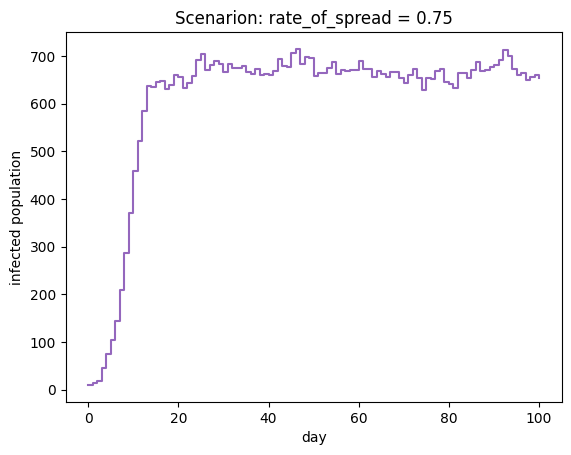

In [12]:
plt.step(obs_times, number_infected, "r", where="post", color="tab:purple")
plt.title(f"Scenario: rate_of_spread = {rate_of_spread}")
plt.ylabel("infected population")
plt.xlabel("day")
# plt.show()
plt.savefig("infected_population.jpg")

If we assume 
 is known, BirDePy’s function birdepy.estimate() can be used to estimate the other parameter values:

In [10]:
initial_guess = [0.5] * 3
p_bounds = [[1e-6, 1]] * 3
est = bd.estimate(
    obs_times,
    number_infected,
    initial_guess,
    p_bounds,
    framework="dnm",
    likelihood="da",
    model=model,
    known_p=[0],
    idx_known_p=[3],
)
print("Estimate:", est.p)
print("Standard error:", est.se)

Estimate: [0.7589022239498648, 0.2411087989471017, 0.0010199382114322198]
Standard error: [0.05664956446462749, 0.038564167070951436, 5.2309666665001574e-05]
